In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# stablize random number generator for runs in this notebook
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
#MY_LOCAL_DIR = "hudsonFiles"
#IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", MY_LOCAL_DIR)
IMAGES_PATH = PROJECT_ROOT_DIR #for school make it local directory

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def load_dataset(filename):
    missing_values = ["n/a", "na", "--","?","",'']
    return pd.read_csv(filename, na_values = missing_values)    

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

<h1>Dataset #2 - data_arrhythmia</h1>
<h3>https://www.kaggle.com/bulentesen/cardiac-arrhythmia-database</h3>

The database has 279 features and a diagnosis. 

There are 452 entries each have one of 16 diagnosis, 
where the first is normal and the rest are different conditions.

There is missing data.

The names and id numbers of the patients are not in the database.

In [2]:
myData = load_dataset("data_arrhythmia.csv")
#myData.count()
#myData.head()
#myData.tail()
myData

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


In [3]:
myData.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [4]:
for col in myData.columns: 
    print(col) 

age
sex
height
weight
qrs_duration
p-r_interval
q-t_interval
t_interval
p_interval
qrs
T
P
QRST
J
heart_rate
q_wave
r_wave
s_wave
R'_wave
S'_wave
AA
AB
AC
AD
AE
AF
AG
AH
AI
AJ
AK
AL
AM
AN
AO
AP
AR
AS
AT
AU
AV
AY
AZ
AB'
BB
BC
BD
BE
BF
BG
BH
BI
BJ
BK
BL
BM
BN
BO
BP
BR
BS
BT
BU
BV
BY
BZ
CA
CB
CC
CD
CE
Cf
CG
CH
CI
CJ
CK
CL
CM
CN
CO
CP
CR
CS
CT
CU
CV
CY
CZ
DA
DB
DC
DD
DE
DF
DG
DH
DI
DJ
DK
DL
DM
DN
DO
DP
DR
DS
DT
DU
DV
DY
DZ
EA
EB
EC
ED
EF
EG
EH
EI
EJ
EK
EL
EM
EN
EO
EP
ER
ES
ET
EU
EV
EY
EZ
FA
FB
FC
FD
FE
FF
FG
FH
FI
FJ
FK
FL
FM
FN
FO
FP
FR
FS
FT
FU
FV
FY
FZ
GA
GB
GC
GD
GE
GF
GG
GH
GI
GJ
GK
GL
GM
GN
GO
GP
GR
GS
GT
GU
GV
GY
GZ
HA
HB
HC
HD
HE
HF
HG
HH
HI
HJ
HK
HL
HM
HN
HO
HP
HR
HS
HT
HU
HV
HY
HZ
IA
IB
IC
ID
IE
IF
IG
IH
II
IJ
IK
IL
IM
IN
IO
IP
IR
IS
IT
IU
IV
IY
IZ
JA
JB
JC
JD
JE
JF
JG
JH
JI
JJ
JK
JL
JM
JN
JO
JP
JR
JS
JT
JU
JV
JY
JZ
KA
KB
KC
KD
KE
KF
KG
KH
KI
KJ
KK
KL
KM
KN
KO
KP
KR
KS
KT
KU
KV
KY
KZ
LA
LB
LC
LD
LE
LF
LG
diagnosis


In [5]:
for x in myData.dtypes:
    print(x)

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
floa

<h3>Inspect Diagnosis</h3>
There are 16 types of Diagnoses.
1 is normal.
The rest are different diagnoses.

In [6]:
myData.diagnosis.value_counts().sort_index(ascending=True)

1     245
2      44
3      15
4      15
5      13
6      25
7       3
8       2
9       9
10     50
14      4
15      5
16     22
Name: diagnosis, dtype: int64

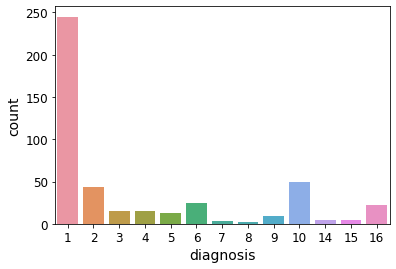

In [7]:
import seaborn as sns
sns.countplot(myData.diagnosis)

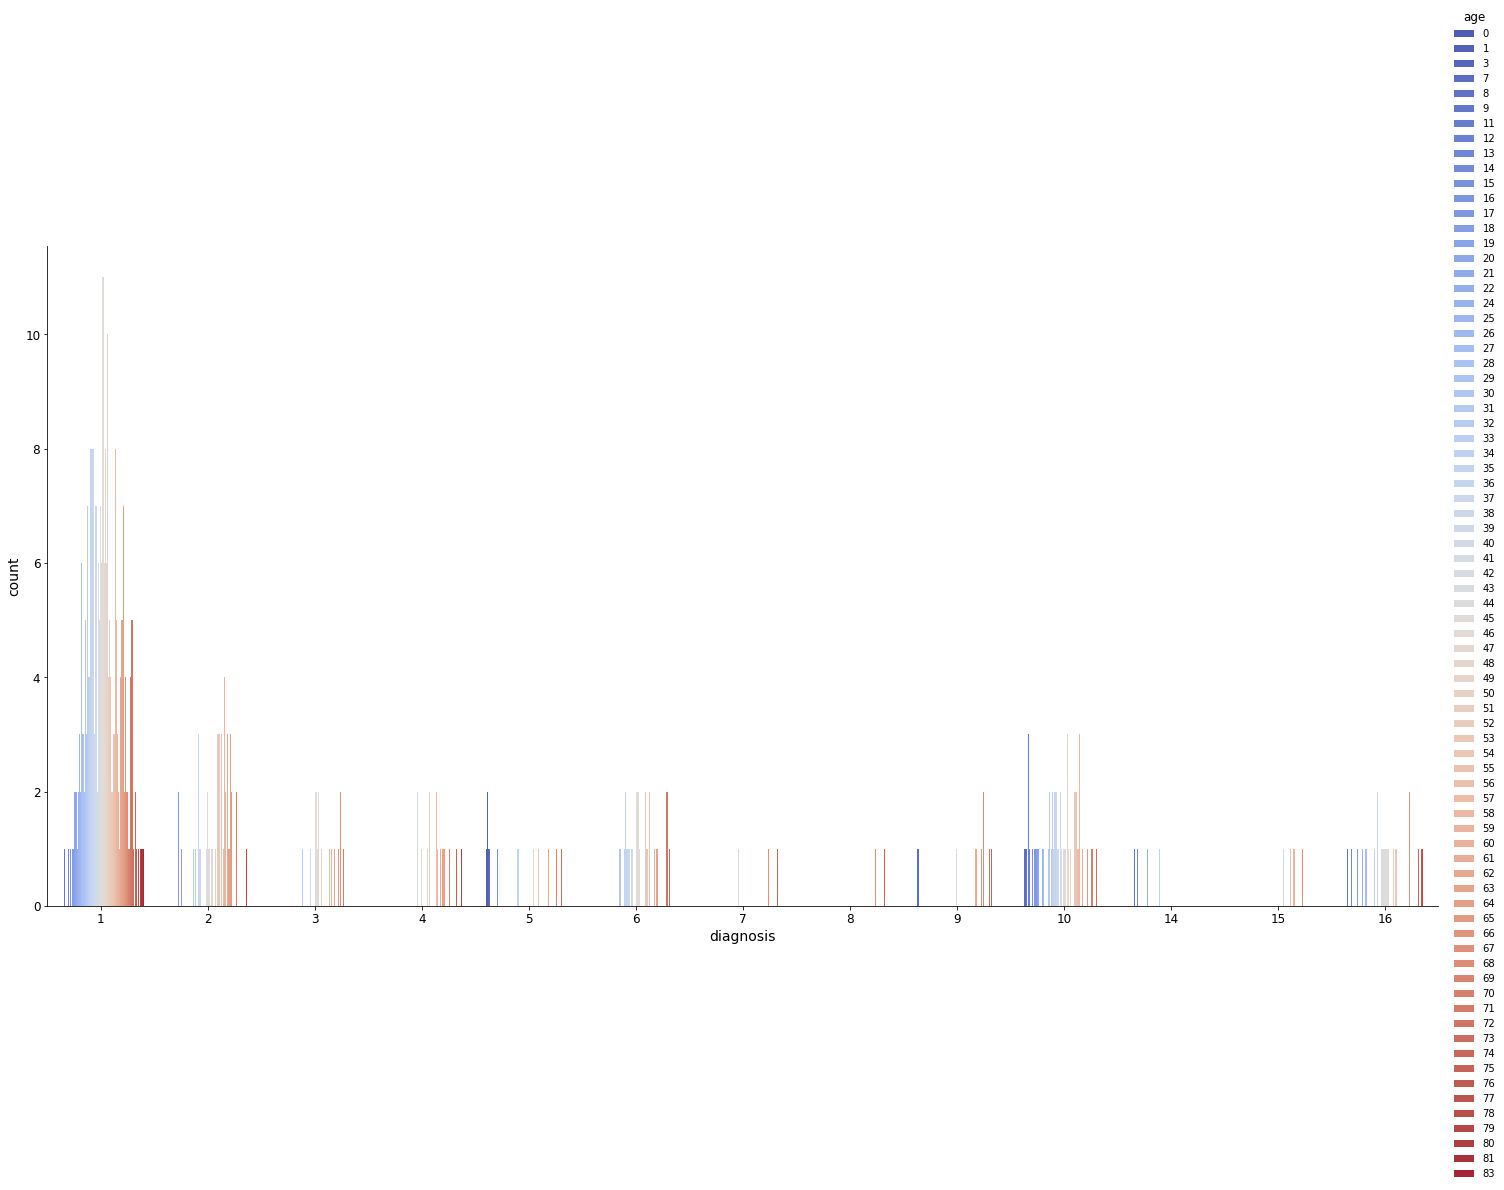

In [8]:
sns.catplot('diagnosis', kind='count', hue='age', data=myData, palette='coolwarm', height=10, aspect=2.0)

<h3>Narrow down to diagnosis 1 or 10</h3>
Only select rows with diagnosis 1 or 10 and give a probability to having symptoms of 1 (normal) or diagnosis 10. 
This narrowed it down from 452 to 295 records.
Alternatively, I could have grouped 2-9, and 14-16, into group 1 and given a proabability about 10 or not 10.
Or I could have grouped 2-16 together and given a probablity of 1(normal) or 2-16 (something wrong). 

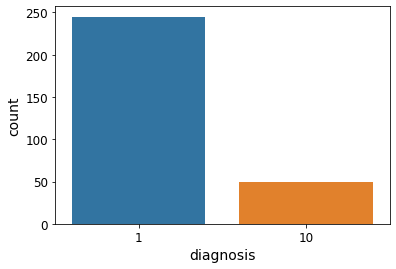

In [9]:
diagnosisSet = [1, 10]
df = myData[myData.diagnosis.isin(diagnosisSet)]
sns.countplot(df.diagnosis)

In [10]:
df
df.shape


(295, 280)

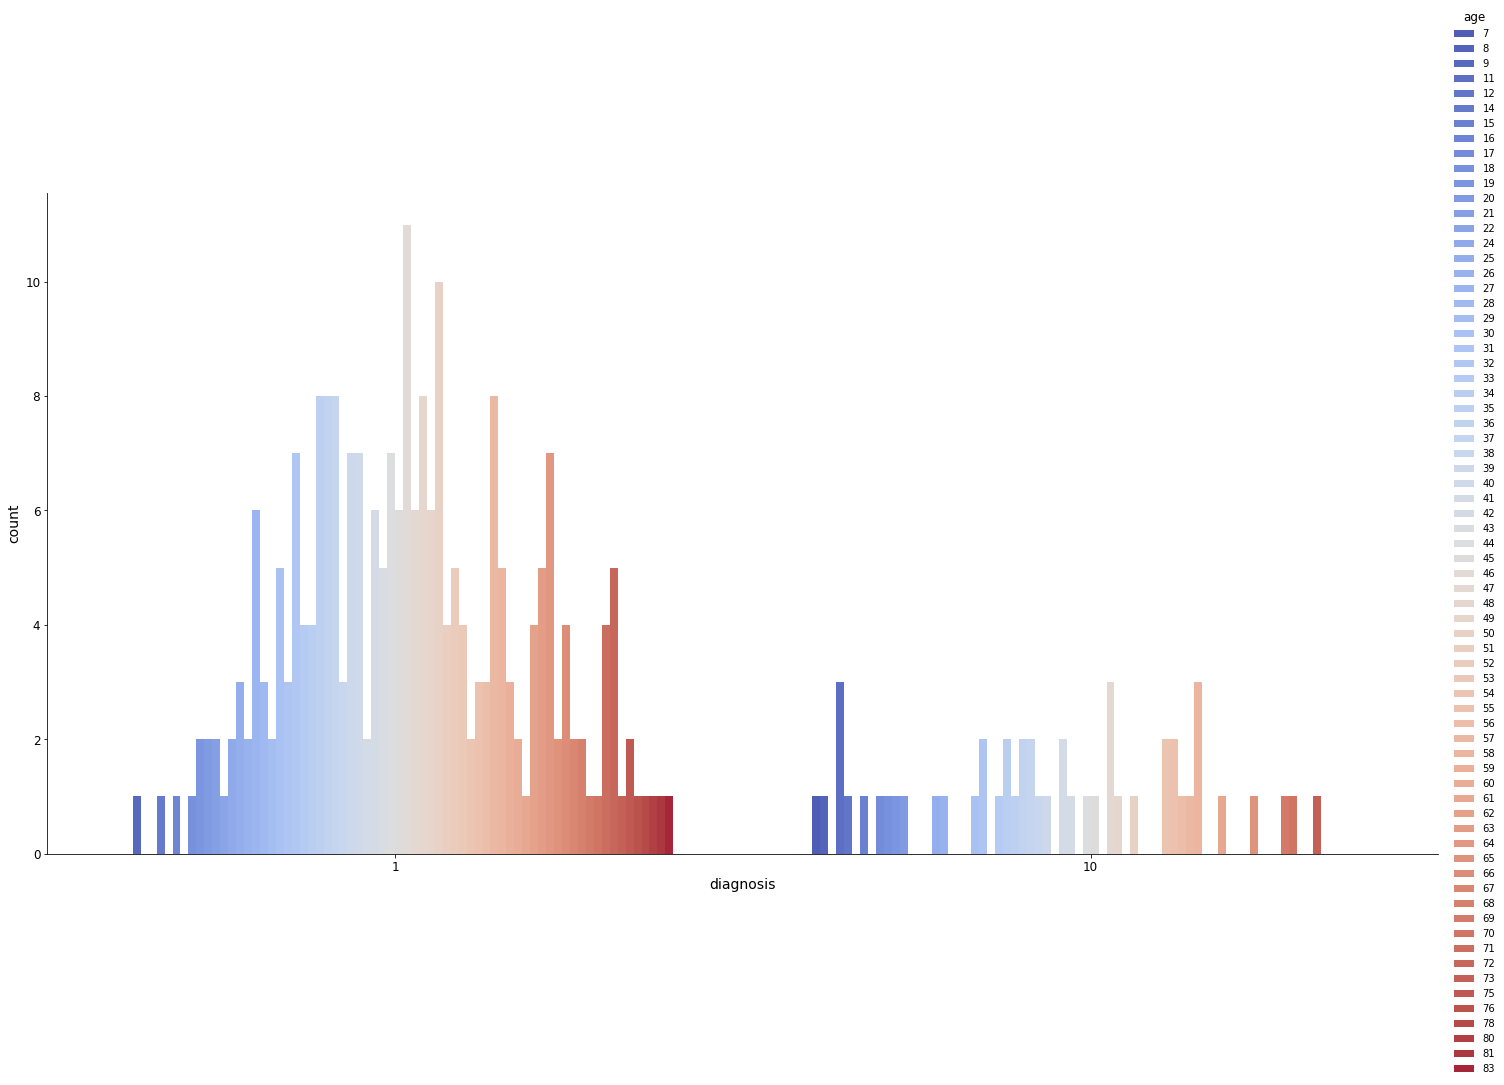

In [11]:
sns.catplot('diagnosis', kind='count', hue='age', data=df, palette='coolwarm', height=10, aspect=2.0)

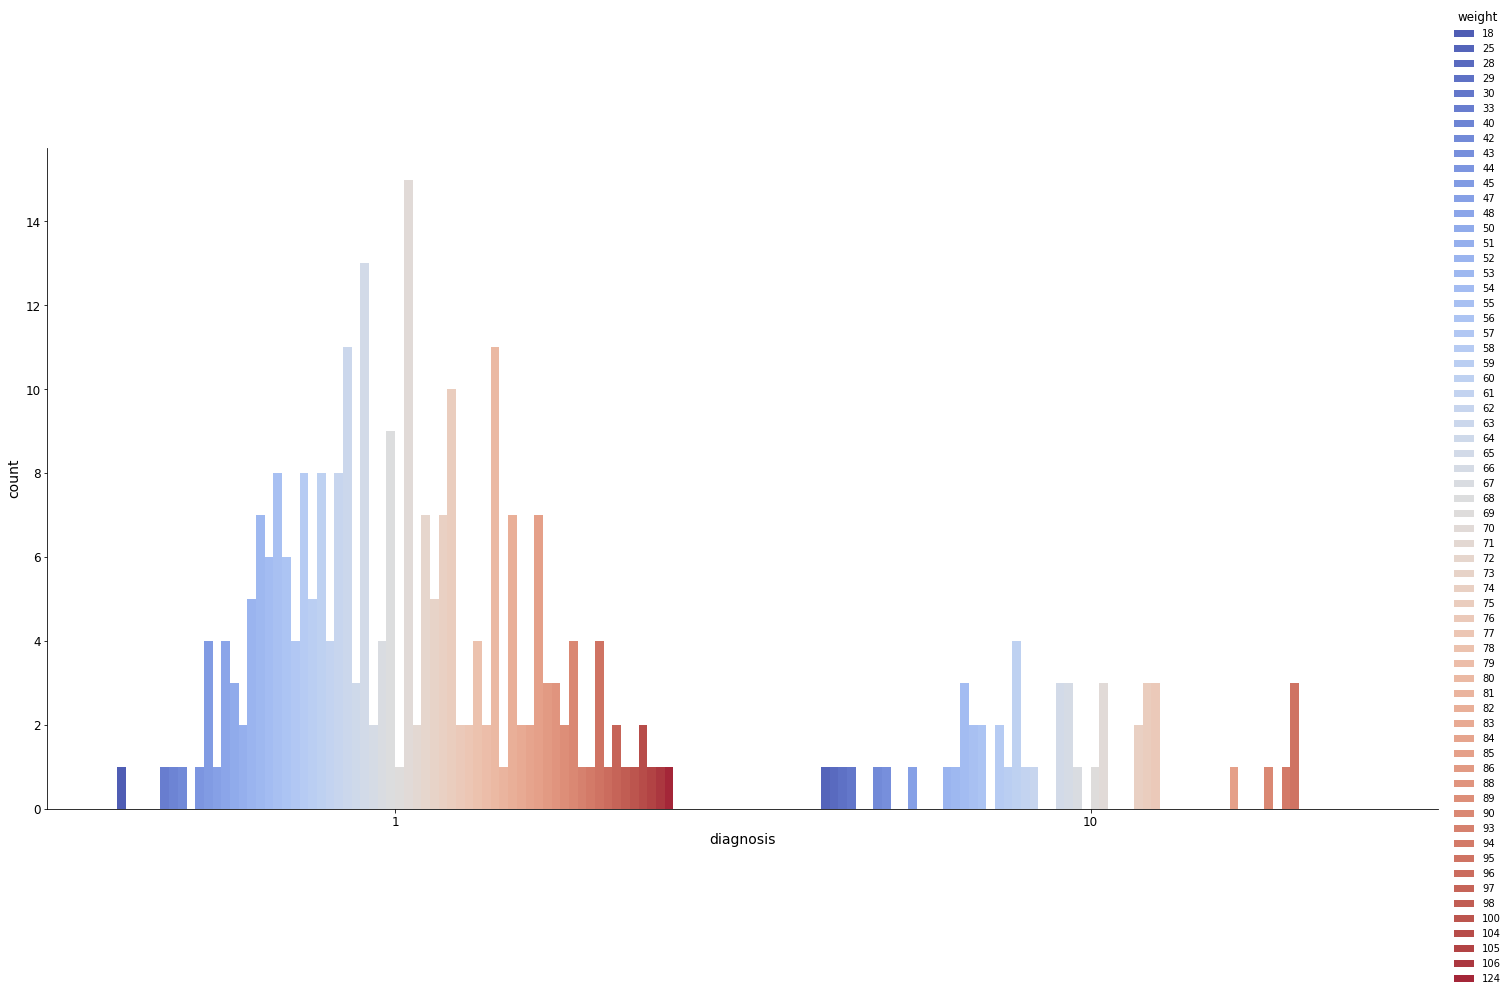

In [12]:
sns.catplot('diagnosis', kind='count', hue='weight', data=df, palette='coolwarm', height=10, aspect=2.0)

<h2>Clean the Data </h2>

<h3> rename columns with tick marks </h3>

In [13]:
df1 = df.rename(columns={'AB\'':'AB'})
df2 = df1.rename(columns={'R\'_wave':'Rt_wave'})
df3 = df2.rename(columns={'S\'_wave':'St_wave'})
for col in df3.columns: 
    print(col) 
df = df3   

age
sex
height
weight
qrs_duration
p-r_interval
q-t_interval
t_interval
p_interval
qrs
T
P
QRST
J
heart_rate
q_wave
r_wave
s_wave
Rt_wave
St_wave
AA
AB
AC
AD
AE
AF
AG
AH
AI
AJ
AK
AL
AM
AN
AO
AP
AR
AS
AT
AU
AV
AY
AZ
AB
BB
BC
BD
BE
BF
BG
BH
BI
BJ
BK
BL
BM
BN
BO
BP
BR
BS
BT
BU
BV
BY
BZ
CA
CB
CC
CD
CE
Cf
CG
CH
CI
CJ
CK
CL
CM
CN
CO
CP
CR
CS
CT
CU
CV
CY
CZ
DA
DB
DC
DD
DE
DF
DG
DH
DI
DJ
DK
DL
DM
DN
DO
DP
DR
DS
DT
DU
DV
DY
DZ
EA
EB
EC
ED
EF
EG
EH
EI
EJ
EK
EL
EM
EN
EO
EP
ER
ES
ET
EU
EV
EY
EZ
FA
FB
FC
FD
FE
FF
FG
FH
FI
FJ
FK
FL
FM
FN
FO
FP
FR
FS
FT
FU
FV
FY
FZ
GA
GB
GC
GD
GE
GF
GG
GH
GI
GJ
GK
GL
GM
GN
GO
GP
GR
GS
GT
GU
GV
GY
GZ
HA
HB
HC
HD
HE
HF
HG
HH
HI
HJ
HK
HL
HM
HN
HO
HP
HR
HS
HT
HU
HV
HY
HZ
IA
IB
IC
ID
IE
IF
IG
IH
II
IJ
IK
IL
IM
IN
IO
IP
IR
IS
IT
IU
IV
IY
IZ
JA
JB
JC
JD
JE
JF
JG
JH
JI
JJ
JK
JL
JM
JN
JO
JP
JR
JS
JT
JU
JV
JY
JZ
KA
KB
KC
KD
KE
KF
KG
KH
KI
KJ
KK
KL
KM
KN
KO
KP
KR
KS
KT
KU
KV
KY
KZ
LA
LB
LC
LD
LE
LF
LG
diagnosis


<h3> remove empty and mostly empty columns </h3>

In [14]:
# REMOVE COLUMNS WITH ALL ZEROS
zero_cols = [ col for col, is_zero in ((df == 0).sum() == df.shape[0]).items() if is_zero ]
#df.drop(zero_cols, axis=1, inplace=True)  example: ufo.drop('City', axis=1, inplace=True)
print("Columns whose rows are all zeros:")
print(zero_cols)
df1 = df.drop(zero_cols, axis=1)

#REMOVE mostly empty column "J"
df2 = df1.drop(["J"], axis=1)

#Struggled with getting rid of missing data (,,,,) so finally removed column T and P
#also had trouble with "in-Place" so used tmp dbs
#given time, come back here find out what is going on with not finding missing values
#see (load_dataset function at top and last cell in this section) and leave them in
df3 = df2.drop(["T"], axis=1)
df4 = df3.drop(["P"], axis=1)
df5 = df4.drop(["QRST"], axis=1)

df5.shape

Columns whose rows are all zeros:
['St_wave', 'AB', 'AF', 'AP', 'BH', 'BS', 'BT', 'BU', 'CB', 'CD', 'CG', 'CI', 'CN', 'CS', 'CV', 'DE', 'DU', 'DV', 'EJ', 'EK', 'EL', 'ET', 'EV', 'EY', 'EZ', 'FF', 'FH', 'FI', 'FJ', 'FL', 'FS', 'FV', 'FZ', 'GA', 'GH', 'IB', 'IL', 'KP', 'LC']


(295, 236)

In [15]:
#Set up so diagnosis values will be 0 and 1
# 0 - diagnosis of ailment #10
# 1 - normal

df5['diagnosis'].replace(
    to_replace=[10],
    value=0,
    inplace=True
)

In [16]:
#Save abbreviated database to file
df5.to_csv('diagnosesOneAndTen.csv', index=False)

In [17]:
df = load_dataset("diagnosesOneAndTen.csv")
df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
0,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,0
1,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,1
2,40,1,160,52,77,129,377,133,77,77,...,-0.4,0.0,6.5,0.0,0.0,0.4,1.0,14.3,20.5,1
3,49,1,162,54,78,0,376,157,70,67,...,-0.3,0.0,8.2,-1.9,0.0,0.1,0.5,15.8,19.8,1
4,44,0,168,56,84,118,354,160,63,61,...,0.1,0.0,7.0,-1.3,0.0,0.6,2.1,12.5,30.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,20,1,157,57,81,151,363,166,80,43,...,0.0,0.0,7.2,-0.7,0.0,0.5,2.3,17.6,39.2,1
291,53,1,160,70,80,199,382,154,117,-37,...,0.0,0.0,4.3,-5.0,0.0,0.7,0.6,-4.4,-0.5,1
292,37,0,190,85,100,137,361,201,73,86,...,-0.5,0.0,15.6,-1.6,0.0,0.4,2.4,38.0,62.4,0
293,32,1,155,55,93,106,386,218,63,54,...,0.2,-0.4,12.0,-0.7,0.0,0.5,2.4,25.0,46.6,1


<h2>In the Following Plots: heart diagnosis #10 has value 0 and normal diagnosis has value 1</h2>

In [18]:
df.columns

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs',
       ...
       'KV', 'KY', 'KZ', 'LA', 'LB', 'LD', 'LE', 'LF', 'LG', 'diagnosis'],
      dtype='object', length=236)

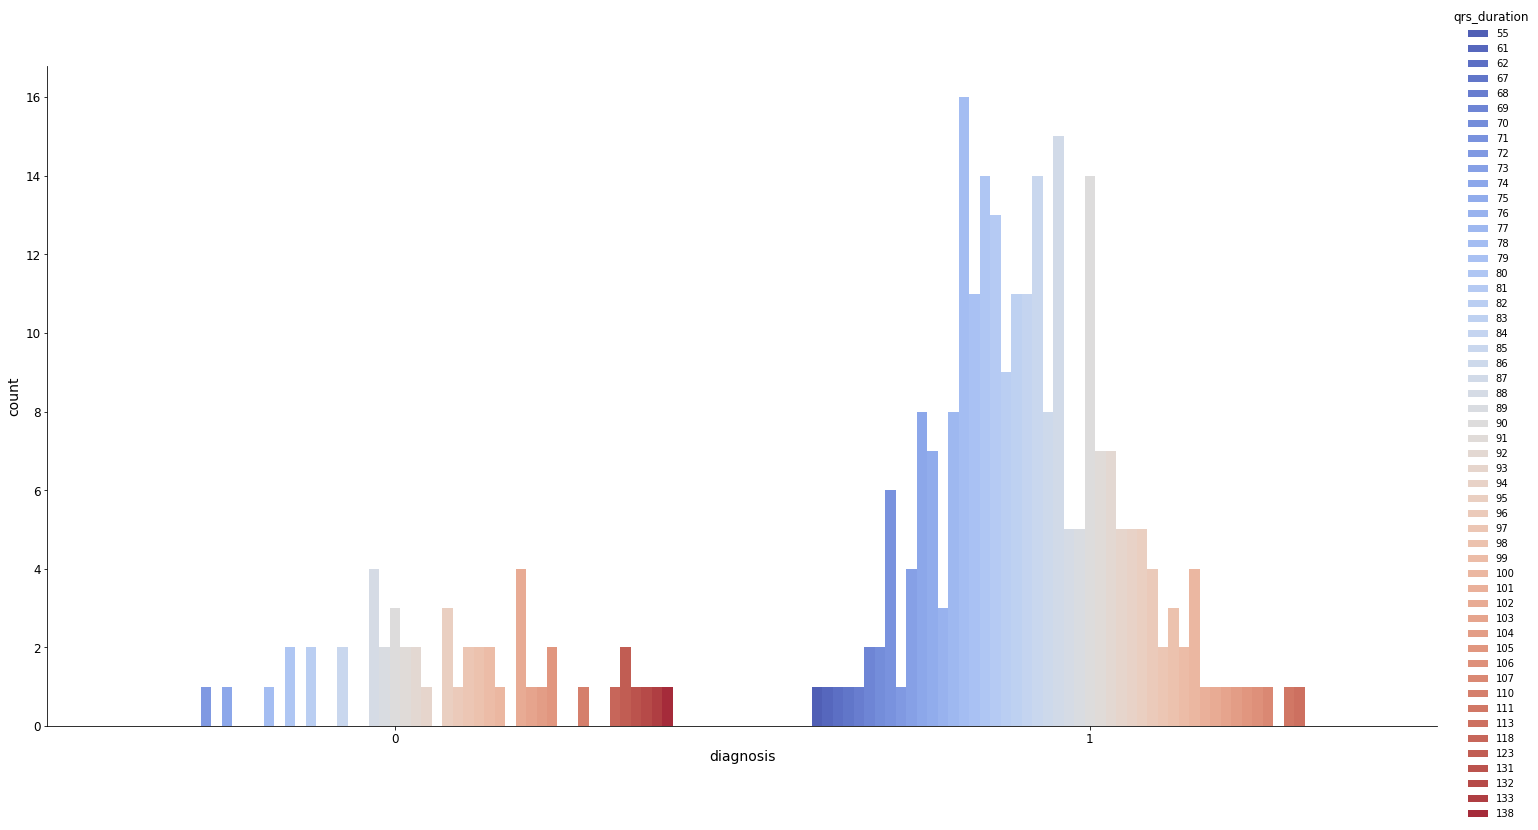

In [19]:
# I ran this plot on the different columns to see if any one column really stood out for catagory 10
# Didn't include them all because it would just take up lots of space 
sns.catplot('diagnosis', kind='count', hue='qrs_duration', data=df, palette='coolwarm', height=10, aspect=2.0)

In [20]:
#Break into train and test sets to run this in Logistic Regression with Stochastic Gradient Descent
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=21)
train_set.to_csv('Arrhythmia_TrainingData.csv', sep=',', encoding='utf-8', header= False, index = False)
test_set.to_csv('Arrhythmia_TestingData.csv', sep=',', encoding='utf-8', header= False, index = False)

<h1>  *** Now we can run Logistic Regression on Arrhythmia Data! *** </h1>

<h2>Final Look at Arrhythmia Training and Testing Datasets</h2>

In [21]:
traindf = load_dataset('Arrhythmia_TrainingData.csv');
traindf

,39,1,164,62,79,155,367,153,95,50,...,-0.1.1,0.0.31,9.7,-0.7,0.0.32,0.8.4,1.3.2,24.1.1,33.7,1.1.1
0,38,1,160,63,79,0,376,165,0,34,...,-0.4,0.0,10.1,0.0,0.0,0.0,1.5,26.2,37.0,1
1,44,0,178,89,106,183,380,147,94,-2,...,-0.4,-0.4,8.2,-1.3,0.0,0.5,0.8,17.9,24.1,1
2,35,1,162,68,80,156,364,134,116,60,...,-0.1,-0.6,10.2,-1.6,0.0,1.3,1.0,17.0,23.6,1
3,36,0,171,76,90,156,364,170,86,69,...,0.4,-0.6,9.8,-1.3,0.0,0.6,2.7,17.4,46.0,0
4,36,1,158,58,76,136,373,152,80,74,...,0.0,0.0,6.6,-1.0,0.0,0.8,2.5,12.7,32.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,33,1,160,69,83,174,381,125,83,69,...,-0.2,0.0,12.3,0.0,0.0,0.4,1.1,34.4,41.2,1
231,50,0,168,80,95,159,358,166,96,-50,...,-0.2,0.0,8.1,-6.5,0.0,0.6,0.8,-5.9,0.1,1
232,35,1,158,60,87,138,383,178,68,61,...,-0.2,0.0,11.2,0.0,0.0,0.4,3.5,29.1,60.6,1
233,25,1,160,56,86,162,376,184,106,25,...,-0.4,0.0,17.2,0.0,0.0,1.3,2.6,48.1,73.0,1


In [22]:
testdf = load_dataset('Arrhythmia_TestingData.csv');
testdf

,52,1,155,104,84,188,450,193,89,22,...,-0.1.1,0.0.31,7.6,-3.7,0.0.32,0.4.6,0.7.1,8.6,15.7,1.2
0,65,0,171,85,100,139,388,182,91,61,...,-0.4,-1.3,18.5,-0.9,0.0,0.9,1.7,41.0,55.2,1
1,63,1,163,62,79,160,371,171,100,9,...,0.5,0.0,4.0,-2.1,0.0,0.9,2.3,5.9,27.5,1
2,29,0,166,63,81,143,325,218,74,24,...,0.1,0.0,7.8,-1.3,0.0,0.5,2.3,14.1,37.1,1
3,43,0,176,72,85,166,335,156,109,76,...,0.0,-0.7,6.9,0.0,0.0,0.3,1.7,26.9,40.5,1
4,66,1,160,124,99,154,329,172,95,-48,...,0.0,0.0,4.3,-5.2,0.0,0.6,1.7,-7.2,4.7,1
5,36,1,160,70,78,118,241,152,68,26,...,-0.9,0.0,11.8,0.0,0.0,0.5,-0.5,28.3,24.1,1
6,73,0,165,58,104,0,372,159,117,-26,...,-0.2,0.0,5.6,-1.4,0.0,-0.3,1.7,9.5,23.7,0
7,68,1,168,59,78,159,356,164,83,-51,...,-0.1,0.0,7.0,-2.7,0.0,0.4,2.6,6.2,31.1,1
8,21,1,156,44,78,151,363,154,87,84,...,0.2,0.0,7.5,0.0,0.0,-0.1,2.5,28.5,49.0,1
9,43,0,163,85,90,169,357,151,102,-29,...,-0.1,0.0,9.9,-2.7,0.0,0.0,2.3,14.7,31.7,1


<h1> Try some other breakouts of columns in database </h1>
Didn't really work any better so we don't need to do this...

In [23]:
df.columns

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs',
       ...
       'KV', 'KY', 'KZ', 'LA', 'LB', 'LD', 'LE', 'LF', 'LG', 'diagnosis'],
      dtype='object', length=236)

In [24]:
df.columns

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs',
       ...
       'KV', 'KY', 'KZ', 'LA', 'LB', 'LD', 'LE', 'LF', 'LG', 'diagnosis'],
      dtype='object', length=236)

In [25]:
# Try on a subset of columns maybe 237 features are too many!

columnsToRemove = ['AA', 'AC', 'AD', 'AE', 'AG','AH', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AR', 'AS', 'AT', 'AU','AV', 'AY', 'AZ',\
'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BI', 'BJ','BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BR', 'BV', 'BY', 'BZ',\
'CA', 'CC','CE', 'Cf', 'CH', 'CJ', 'CK', 'CL', 'CM', 'CO', 'CP', 'CR', 'CT', 'CU','CY', 'CZ',\
'DA', 'DB', 'DC', 'DD', 'DF', 'DG', 'DH', 'DI', 'DJ', 'DK','DL', 'DM', 'DN', 'DO', 'DP', 'DR', 'DS', 'DT', 'DY', 'DZ',\
'EA', 'EB','EC', 'ED', 'EF', 'EG', 'EH', 'EI', 'EM', 'EN', 'EO','EP', 'ER', 'ES', 'EU',\
'FA', 'FB', 'FC', 'FD', 'FE','FG', 'FK', 'FM', 'FN', 'FO', 'FP', 'FR', 'FT', 'FU','FY',\
'GB', 'GC', 'GD', 'GE', 'GF', 'GG', 'GI', 'GJ','GK', 'GL', 'GM', 'GN', 'GO', 'GP', 'GR', 'GS', 'GT','GU', 'GV', 'GY', 'GZ',\
'HA', 'HB', 'HC', 'HD', 'HE','HF', 'HG', 'HH', 'HI', 'HJ', 'HK', 'HL', 'HM', 'HN','HO', 'HP', 'HR', 'HS', 'HT', 'HU', 'HV', 'HY', 'HZ',\
'IA', 'IC', 'ID', 'IE', 'IF', 'IG', 'IH', 'II', 'IJ','IK', 'IM', 'IN', 'IO', 'IP', 'IR', 'IS', 'IT', 'IU','IV', 'IY', 'IZ',\
'JA', 'JB', 'JC', 'JD', 'JE', 'JF','JG', 'JH', 'JI', 'JJ', 'JK', 'JL', 'JM', 'JN', 'JO','JP', 'JR', 'JS', 'JT', 'JU', 'JV', 'JY', 'JZ',\
'KA','KB', 'KC', 'KD', 'KE', 'KF', 'KG', 'KH', 'KI', 'KJ','KK', 'KL', 'KM', 'KN', 'KO', 'KR', 'KS', 'KT', 'KU','KV', 'KY', 'KZ',\
'LA', 'LB', 'LD', 'LE', 'LF', 'LG']
firstHalf = df.drop(columnsToRemove, axis=1)
col = firstHalf.columns
print(col) 

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs', 'heart_rate',
       'q_wave', 'r_wave', 's_wave', 'Rt_wave', 'diagnosis'],
      dtype='object')


In [26]:
#Break into train and test sets to run this in Logistic Regression with Stochastic Gradient Descent
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(firstHalf, test_size=0.2, random_state=21)
train_set.to_csv('Arrhythmia_First_TrainingData.csv', sep=',', encoding='utf-8', header= False, index = False)
test_set.to_csv('Arrhythmia_First_TestingData.csv', sep=',', encoding='utf-8', header= False, index = False)

In [27]:
columnsToRemove = ['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval', 'q-t_interval',\
                   't_interval', 'p_interval', 'qrs', 'heart_rate','q_wave', 'r_wave', 's_wave', 'Rt_wave']
lastHalf = df.drop(columnsToRemove, axis=1)
col = lastHalf.columns
print(col) 

Index(['AA', 'AC', 'AD', 'AE', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL',
       ...
       'KV', 'KY', 'KZ', 'LA', 'LB', 'LD', 'LE', 'LF', 'LG', 'diagnosis'],
      dtype='object', length=221)


In [28]:
#Break into train and test sets to run this in Logistic Regression with Stochastic Gradient Descent
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(lastHalf, test_size=0.2, random_state=21)
train_set.to_csv('Arrhythmia_Last_TrainingData.csv', sep=',', encoding='utf-8', header= False, index = False)
test_set.to_csv('Arrhythmia_Last_TestingData.csv', sep=',', encoding='utf-8', header= False, index = False)

In [29]:
stop here otherwise kernel will get really busy!

SyntaxError: invalid syntax (<ipython-input-29-69df9f68a678>, line 1)

In [ ]:
# Takes a really really long time!
import pandas_profiling 
#train.profile_report()
firstHalf.profile_report()


In [30]:
traindf

,39,1,164,62,79,155,367,153,95,50,...,-0.1.1,0.0.31,9.7,-0.7,0.0.32,0.8.4,1.3.2,24.1.1,33.7,1.1.1
0,38,1,160,63,79,0,376,165,0,34,...,-0.4,0.0,10.1,0.0,0.0,0.0,1.5,26.2,37.0,1
1,44,0,178,89,106,183,380,147,94,-2,...,-0.4,-0.4,8.2,-1.3,0.0,0.5,0.8,17.9,24.1,1
2,35,1,162,68,80,156,364,134,116,60,...,-0.1,-0.6,10.2,-1.6,0.0,1.3,1.0,17.0,23.6,1
3,36,0,171,76,90,156,364,170,86,69,...,0.4,-0.6,9.8,-1.3,0.0,0.6,2.7,17.4,46.0,0
4,36,1,158,58,76,136,373,152,80,74,...,0.0,0.0,6.6,-1.0,0.0,0.8,2.5,12.7,32.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,33,1,160,69,83,174,381,125,83,69,...,-0.2,0.0,12.3,0.0,0.0,0.4,1.1,34.4,41.2,1
231,50,0,168,80,95,159,358,166,96,-50,...,-0.2,0.0,8.1,-6.5,0.0,0.6,0.8,-5.9,0.1,1
232,35,1,158,60,87,138,383,178,68,61,...,-0.2,0.0,11.2,0.0,0.0,0.4,3.5,29.1,60.6,1
233,25,1,160,56,86,162,376,184,106,25,...,-0.4,0.0,17.2,0.0,0.0,1.3,2.6,48.1,73.0,1


In [31]:
testdf

,52,1,155,104,84,188,450,193,89,22,...,-0.1.1,0.0.31,7.6,-3.7,0.0.32,0.4.6,0.7.1,8.6,15.7,1.2
0,65,0,171,85,100,139,388,182,91,61,...,-0.4,-1.3,18.5,-0.9,0.0,0.9,1.7,41.0,55.2,1
1,63,1,163,62,79,160,371,171,100,9,...,0.5,0.0,4.0,-2.1,0.0,0.9,2.3,5.9,27.5,1
2,29,0,166,63,81,143,325,218,74,24,...,0.1,0.0,7.8,-1.3,0.0,0.5,2.3,14.1,37.1,1
3,43,0,176,72,85,166,335,156,109,76,...,0.0,-0.7,6.9,0.0,0.0,0.3,1.7,26.9,40.5,1
4,66,1,160,124,99,154,329,172,95,-48,...,0.0,0.0,4.3,-5.2,0.0,0.6,1.7,-7.2,4.7,1
5,36,1,160,70,78,118,241,152,68,26,...,-0.9,0.0,11.8,0.0,0.0,0.5,-0.5,28.3,24.1,1
6,73,0,165,58,104,0,372,159,117,-26,...,-0.2,0.0,5.6,-1.4,0.0,-0.3,1.7,9.5,23.7,0
7,68,1,168,59,78,159,356,164,83,-51,...,-0.1,0.0,7.0,-2.7,0.0,0.4,2.6,6.2,31.1,1
8,21,1,156,44,78,151,363,154,87,84,...,0.2,0.0,7.5,0.0,0.0,-0.1,2.5,28.5,49.0,1
9,43,0,163,85,90,169,357,151,102,-29,...,-0.1,0.0,9.9,-2.7,0.0,0.0,2.3,14.7,31.7,1


In [ ]:
from